<a href="https://colab.research.google.com/github/NitheeshMS/DA_IndianCARs/blob/main/Indian_cars_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/week_6_dataAnalyst/cars_ds_final.csv',index_col=0)
df.head(1)
df.shape

(1276, 140)

In [6]:
df.columns = df.columns.str.lower()

 Checking for  duplicated columns and then check the shape again.

In [7]:
df= df[['make','model','ex-showroom_price','body_type','displacement', 'cylinders', 'fuel_system', 'fuel_tank_capacity', 'fuel_type',  'city_mileage',  'seating_capacity','basic_warranty', 'child_safety_locks', 'number_of_airbags', 'parking_assistance',  'navigation_system']]

In [8]:
df.isnull().sum()

make                   75
model                   0
ex-showroom_price       0
body_type               6
displacement           12
cylinders              66
fuel_system             8
fuel_tank_capacity     69
fuel_type               0
city_mileage          555
seating_capacity        6
basic_warranty        440
child_safety_locks     75
number_of_airbags     135
parking_assistance    290
navigation_system     593
dtype: int64

In [9]:
df=df.rename(columns={'make':'company','ex-showroom_price':'price'})

In [10]:
df.dtypes

company                object
model                  object
price                  object
body_type              object
displacement           object
cylinders             float64
fuel_system            object
fuel_tank_capacity     object
fuel_type              object
city_mileage           object
seating_capacity      float64
basic_warranty         object
child_safety_locks     object
number_of_airbags     float64
parking_assistance     object
navigation_system      object
dtype: object

In [11]:
df['company'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [12]:
df['company'].isnull().value_counts()

False    1201
True       75
Name: company, dtype: int64

In [13]:
df=df.dropna(subset=['company'])

In [73]:
df['price'].dtypes

dtype('O')

In [75]:
df['price'] = df['price'].str.replace('Rs.', '')
df['price']


<ipython-input-75-49c77b37b06b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace('Rs.', '')


0         2,92,667
1         2,36,447
2         2,96,661
3         3,34,768
4         2,72,223
           ...    
1271     13,02,000
1272     14,21,000
1273     14,31,000
1274     12,01,000
1275     68,62,560
Name: price, Length: 1183, dtype: object

In [77]:
df['price'] = df['price'].str.replace(',', '')
df['price']

0         292667
1         236447
2         296661
3         334768
4         272223
          ...   
1271     1302000
1272     1421000
1273     1431000
1274     1201000
1275     6862560
Name: price, Length: 1183, dtype: object

In [79]:
df['price'] = df['price'].astype(int)

In [19]:
df=df.dropna(subset=['displacement'])

In [20]:
df['cylinders']=df['cylinders'].replace(np.nan,df.cylinders.median())

In [22]:
df=df.dropna(subset=['fuel_system'])


In [23]:
df['fuel_tank_capacity']=df.fuel_tank_capacity.str.strip('litres')


In [24]:
df['fuel_tank_capacity']=df['fuel_tank_capacity'].replace(np.nan,df.cylinders.median())

In [29]:
df['city_mileage']=df['city_mileage'].str.strip('km/litre')


In [30]:
df['city_mileage']=df['city_mileage'].str.replace(',','.')


In [ ]:
df['city_mileage']=df['city_mileage'].str.replace('12.5-12.7 ','12.5')


In [34]:
df['city_mileage']=df['city_mileage'].apply(pd.to_numeric, errors='coerce')


In [37]:
df['city_mileage']=df['city_mileage'].replace(np.nan,df.city_mileage.median())

In [40]:
df['seating_capacity']=df['seating_capacity'].replace(np.nan,df.seating_capacity.median())

In [41]:
df['number_of_airbags']=df['number_of_airbags'].replace(np.nan,df.number_of_airbags.median())

In [42]:
df['parking_assistance']=df['parking_assistance'].replace(np.nan,'No')

In [43]:
df['child_safety_locks']=df['child_safety_locks'].replace(np.nan,'No')

In [44]:
df['navigation_system']=df['navigation_system'].replace(np.nan,'No')

In [45]:
df['basic_warranty']=df['basic_warranty'].str.split('Years').str[0].str.strip()

In [47]:
df['basic_warranty']=df['basic_warranty'].str.extract('(\d+)').astype(float)

In [48]:
df['basic_warranty']=df['basic_warranty'].replace(np.nan,df.basic_warranty.median())

In [50]:
df.head()

,company,model,price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
0,Tata,Nano Genx,"2,92,667",Hatchback,624 cc,2.0,Injection,24,Petrol,15.5,4.0,2.0,Yes,2.0,No,No
1,Tata,Nano Genx,"2,36,447",Hatchback,624 cc,2.0,Injection,24,Petrol,15.5,4.0,2.0,Yes,2.0,No,No
2,Tata,Nano Genx,"2,96,661",Hatchback,624 cc,2.0,Injection,15,CNG,15.5,4.0,2.0,Yes,2.0,No,No
3,Tata,Nano Genx,"3,34,768",Hatchback,624 cc,2.0,Injection,24,Petrol,15.5,4.0,2.0,Yes,2.0,No,No
4,Tata,Nano Genx,"2,72,223",Hatchback,624 cc,2.0,Injection,24,Petrol,15.5,4.0,2.0,Yes,2.0,No,No


**1. Understand Dataset:**

 Get a sense of the dataset structure, including the number of rows and columns.


In [51]:
df.shape

# Display the first few rows of the cleaned dataset
print("\nPreview of the cleaned dataset:")
print(df.head(5))



Preview of the cleaned dataset:
  company      model      price  body_type displacement  cylinders  \
0    Tata  Nano Genx   2,92,667  Hatchback       624 cc        2.0   
1    Tata  Nano Genx   2,36,447  Hatchback       624 cc        2.0   
2    Tata  Nano Genx   2,96,661  Hatchback       624 cc        2.0   
3    Tata  Nano Genx   3,34,768  Hatchback       624 cc        2.0   
4    Tata  Nano Genx   2,72,223  Hatchback       624 cc        2.0   

  fuel_system fuel_tank_capacity fuel_type  city_mileage  seating_capacity  \
0   Injection                24     Petrol          15.5               4.0   
1   Injection                24     Petrol          15.5               4.0   
2   Injection                15        CNG          15.5               4.0   
3   Injection                24     Petrol          15.5               4.0   
4   Injection                24     Petrol          15.5               4.0   

   basic_warranty child_safety_locks  number_of_airbags parking_assistance  \

**3. Data Types:**

Check the data types of each column. Ensure they are appropriate for the analysis.

In [52]:
# Check the data types of each column
# Check the data types of each column
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

company: object
model: object
price: object
body_type: object
displacement: object
cylinders: float64
fuel_system: object
fuel_tank_capacity: object
fuel_type: object
city_mileage: float64
seating_capacity: float64
basic_warranty: float64
child_safety_locks: object
number_of_airbags: float64
parking_assistance: object
navigation_system: object


**4. Descriptive Statistics:**

Calculate basic descriptive statistics such as mean, median, mode, minimum, maximum, and standard deviation for numeric columns.

In [53]:
import pandas as pd

# Assuming your dataframe is named df

# Display basic descriptive statistics for numeric columns
descriptive_stats = df.describe()

# Display the results
print("Descriptive Statistics for Numeric Columns:")
print(descriptive_stats)


Descriptive Statistics for Numeric Columns:
         cylinders  city_mileage  seating_capacity  basic_warranty  \
count  1183.000000   1183.000000       1183.000000     1183.000000   
mean      4.258664     37.523364          5.281488        2.622992   
std       1.452825    756.418945          1.147079        2.840047   
min       2.000000      2.000000          2.000000        1.000000   
25%       4.000000     15.100000          5.000000        2.000000   
50%       4.000000     15.500000          5.000000        2.000000   
75%       4.000000     16.000000          5.000000        3.000000   
max      16.000000  26032.000000         16.000000       24.000000   

       number_of_airbags  
count        1183.000000  
mean            3.429417  
std             2.363688  
min             1.000000  
25%             2.000000  
50%             2.000000  
75%             6.000000  
max            14.000000  


In [57]:
df['price']

0         2,92,667
1         2,36,447
2         2,96,661
3         3,34,768
4         2,72,223
           ...    
1271     13,02,000
1272     14,21,000
1273     14,31,000
1274     12,01,000
1275     68,62,560
Name: price, Length: 1183, dtype: object

**5. Histograms:**

Create histograms to visualize the distribution of key numeric variables (e.g., sales, price).

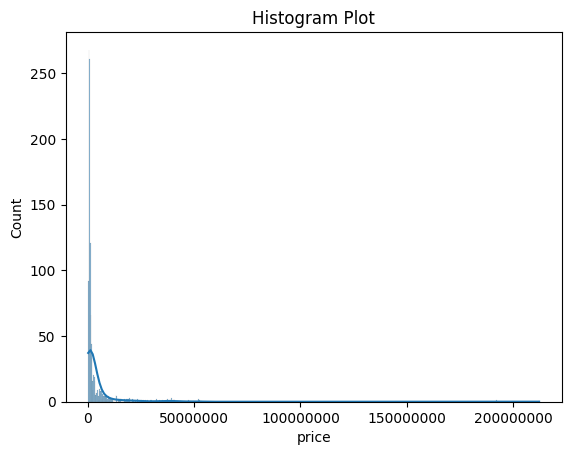

In [81]:
plt.ticklabel_format(style='plain')

sns.histplot(df['price'], kde=True)
plt.xlabel('price')
plt.title('Histogram Plot')
plt.show()

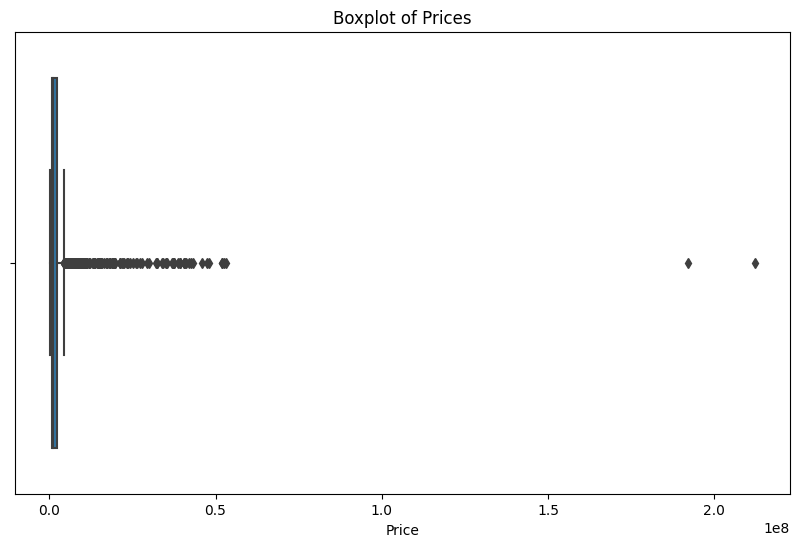

In [83]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

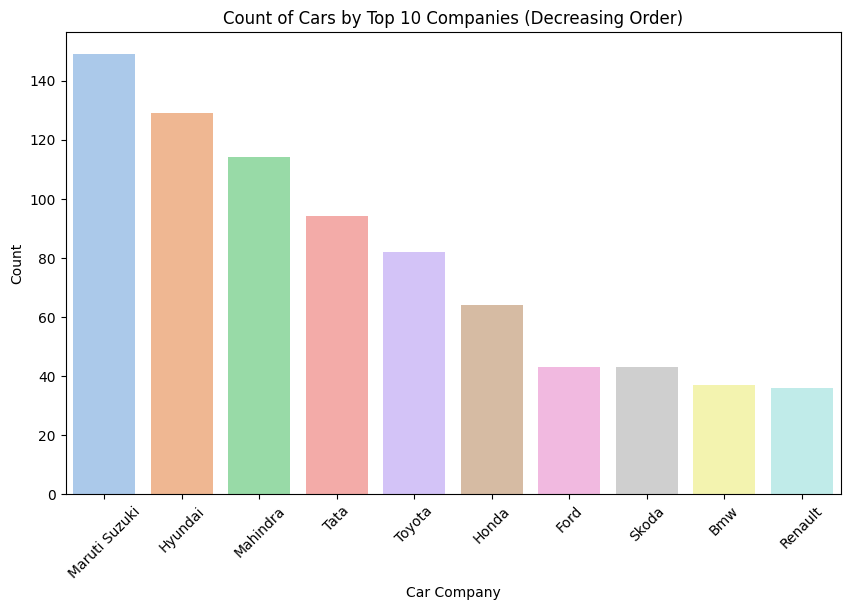

In [86]:
# Get the top 10 car companies with the highest count
top_10_companies = df['company'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 companies
df_top_10 = df[df['company'].isin(top_10_companies)]

# Create a count plot using Seaborn with bars in decreasing order
plt.figure(figsize=(10, 6))
sns.countplot(x='company', data=df_top_10, order=df_top_10['company'].value_counts().index, palette='pastel')
plt.title('Count of Cars by Top 10 Companies (Decreasing Order)')
plt.xlabel('Car Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-91-185285600b80>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


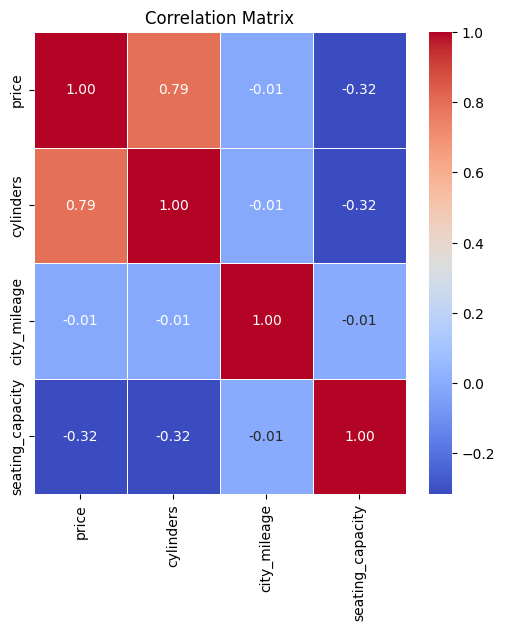

In [91]:
numeric_columns = ['price', 'cylinders', 'fuel_tank_capacity', 'city_mileage', 'seating_capacity']
subset_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

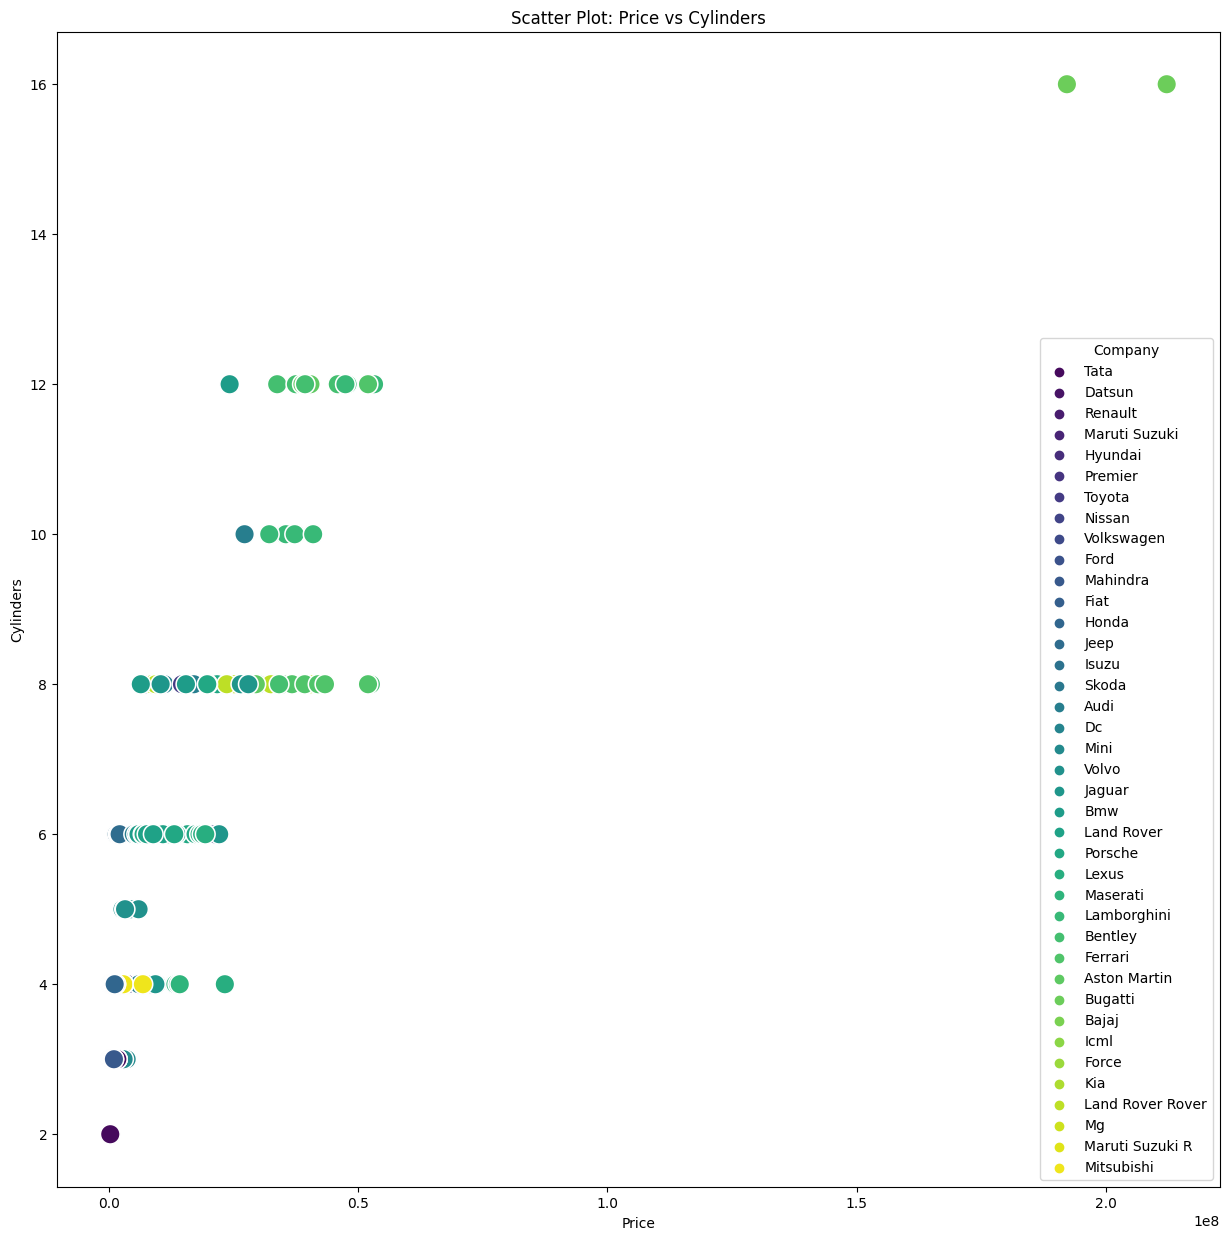

In [96]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='price', y='cylinders', data=df, hue='company', palette='viridis', s=200)
plt.title('Scatter Plot: Price vs Cylinders')
plt.xlabel('Price')
plt.ylabel('Cylinders')
plt.legend(title='Company')
plt.show()

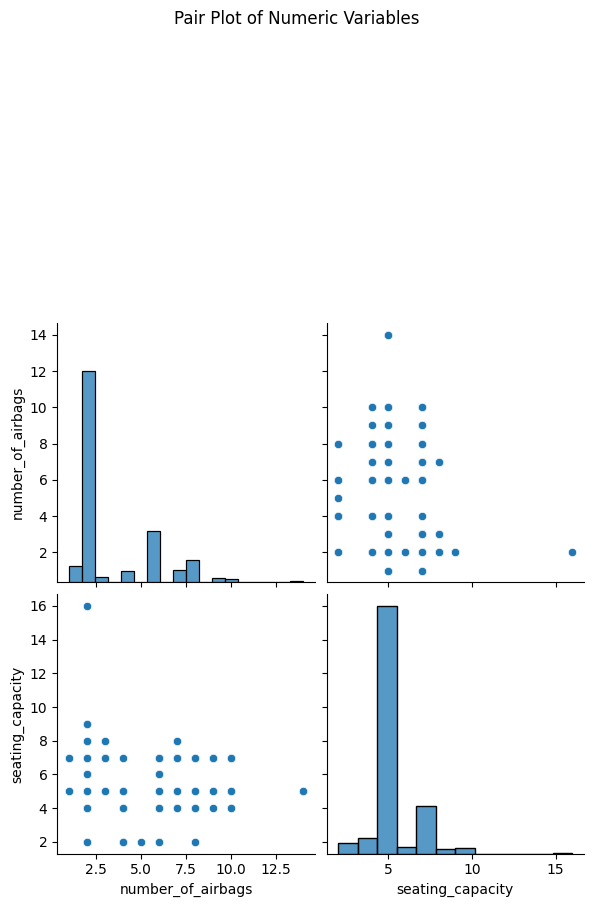

In [99]:
# Selecting relevant numeric columns for pair plot
numeric_columns =['number_of_airbags','seating_capacity']

# Creating a pair plot
sns.pairplot(df[numeric_columns], height=3)
plt.suptitle('Pair Plot of Numeric Variables', y=1.5)
plt.show()

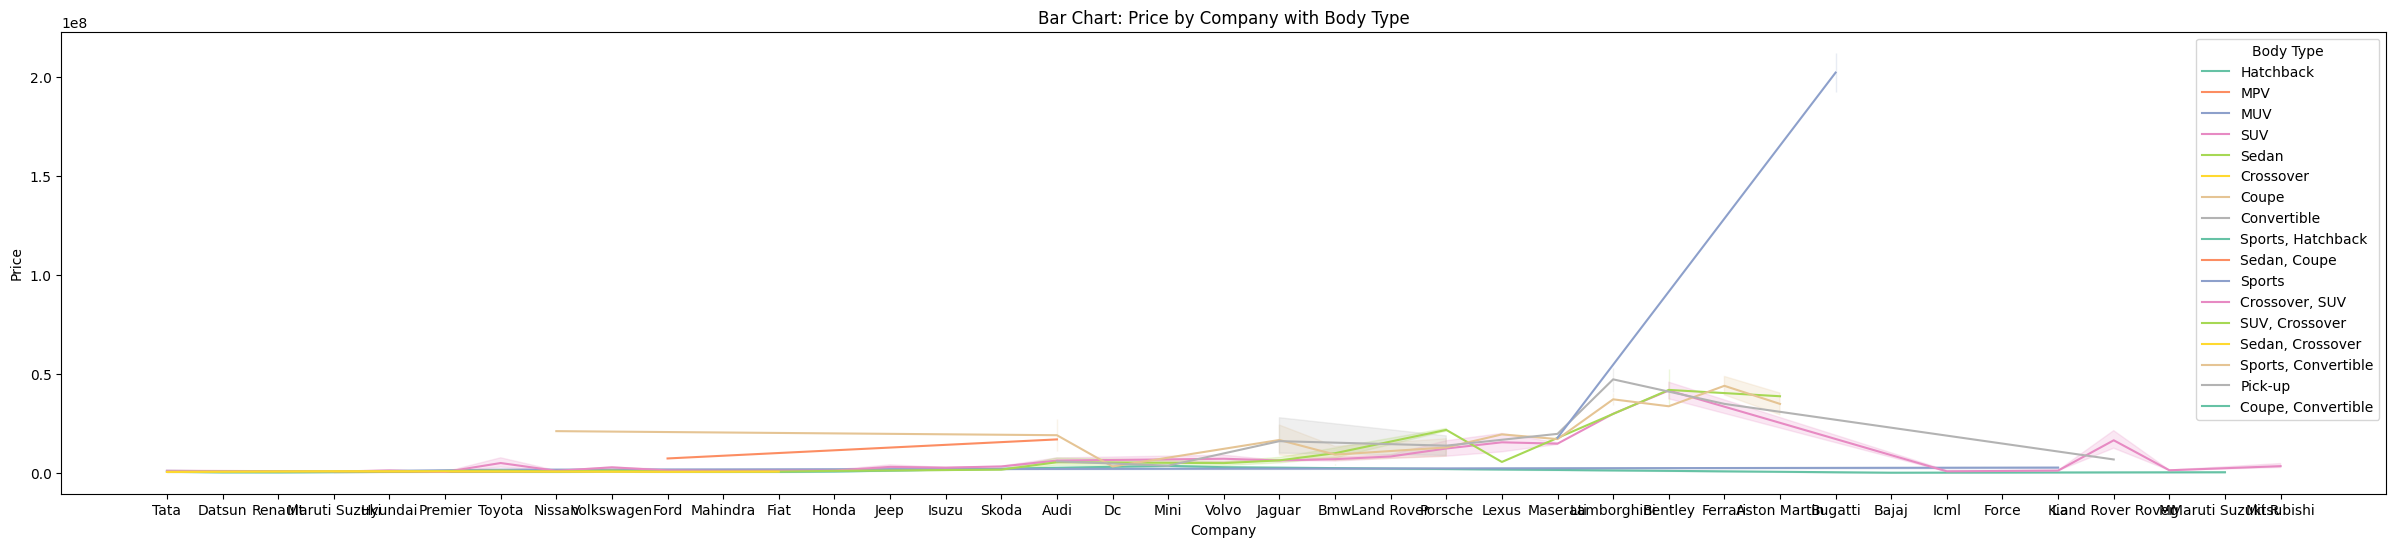

In [106]:
plt.figure(figsize=(30,6))
sns.lineplot(x='company', y='price', hue='body_type', data=df, palette='Set2')
plt.title('Bar Chart: Price by Company with Body Type')
plt.xlabel('Company')
plt.ylabel('Price')
plt.legend(title='Body Type')
plt.show()